# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [5]:
# set up lists, looking for max Temperature (F), Latitude, Humidity (%), Cloudiness (%), Wind Speed (mph) , longitude, date
city_name_list = []
counry_list = []
max_temp_list = []
latitude_list = []
longitude_list = []
humidity_list = []
cloudiness_list = []
wind_speed_list = []
date_list = []
#set up way to keep track of record processing
index_counter = 0
set_counter = 1

In [7]:
print(f"Beginning Data Retrieval ")
print(f"-----------------------------")

# Loop through the list of cities and perform a request for data on each
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        counry_list.append(response["sys"]["country"])
        max_temp_list.append(response['main']['temp_max'])
        latitude_list.append(response['coord']['lat'])
        longitude_list.append(response['coord']['lon'])
        humidity_list.append(response["main"]["humidity"])
        cloudiness_list.append(response["clouds"]["all"])
        wind_speed_list.append(response["wind"]["speed"])
        date_list.append(response["dt"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
        
        else: 
            index_counter = index_counter + 1
        print(f"Processing Record {index_counter} of Set {set_counter} | {city}")
        
    except:
        print(f"City not found. Skipping...")
    
print(f"-----------------------------")   
print(f"Data Retrieval Complete")   
print(f"-----------------------------")   
    


Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 | kiunga
Processing Record 2 of Set 1 | ginir
Processing Record 3 of Set 1 | portland
Processing Record 4 of Set 1 | esperance
Processing Record 5 of Set 1 | vaini
City not found. Skipping...
Processing Record 6 of Set 1 | puerto ayora
Processing Record 7 of Set 1 | atuona
Processing Record 8 of Set 1 | sao filipe
Processing Record 9 of Set 1 | poum
Processing Record 10 of Set 1 | mangan
Processing Record 11 of Set 1 | khatanga
Processing Record 12 of Set 1 | cherskiy
Processing Record 13 of Set 1 | east london
City not found. Skipping...
Processing Record 14 of Set 1 | harper
Processing Record 15 of Set 1 | barrow
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | constitucion
Processing Record 18 of Set 1 | butaritari
Processing Record 19 of Set 1 | bethel
Processing Record 20 of Set 1 | cockburn town
Processing Record 21 of Set 1 | tasiilaq
City not found. Skipping...
Processing

City not found. Skipping...
Processing Record 38 of Set 4 | antofagasta
Processing Record 39 of Set 4 | klaksvik
Processing Record 40 of Set 4 | hobyo
Processing Record 41 of Set 4 | skjervoy
Processing Record 42 of Set 4 | bubaque
Processing Record 43 of Set 4 | conway
City not found. Skipping...
Processing Record 44 of Set 4 | vanimo
Processing Record 45 of Set 4 | bathsheba
Processing Record 46 of Set 4 | narsaq
Processing Record 47 of Set 4 | grand forks
Processing Record 48 of Set 4 | harwich
City not found. Skipping...
Processing Record 49 of Set 4 | buala
Processing Record 50 of Set 4 | sao miguel dos campos
Processing Record 0 of Set 5 | great yarmouth
Processing Record 1 of Set 5 | bagdarin
Processing Record 2 of Set 5 | general pico
Processing Record 3 of Set 5 | geraldton
Processing Record 4 of Set 5 | nieves
Processing Record 5 of Set 5 | saldanha
Processing Record 6 of Set 5 | port keats
Processing Record 7 of Set 5 | arica
Processing Record 8 of Set 5 | torbay
Processing 

Processing Record 22 of Set 8 | natchitoches
Processing Record 23 of Set 8 | hailey
Processing Record 24 of Set 8 | sheffield
Processing Record 25 of Set 8 | paita
Processing Record 26 of Set 8 | mnogovershinnyy
Processing Record 27 of Set 8 | fare
City not found. Skipping...
Processing Record 28 of Set 8 | tashtyp
Processing Record 29 of Set 8 | tibati
Processing Record 30 of Set 8 | storforshei
Processing Record 31 of Set 8 | sauda
Processing Record 32 of Set 8 | magadan
Processing Record 33 of Set 8 | seoul
Processing Record 34 of Set 8 | padang
City not found. Skipping...
Processing Record 35 of Set 8 | merauke
Processing Record 36 of Set 8 | adrar
Processing Record 37 of Set 8 | deputatskiy
Processing Record 38 of Set 8 | dolinsk
Processing Record 39 of Set 8 | wajima
City not found. Skipping...
Processing Record 40 of Set 8 | inirida
Processing Record 41 of Set 8 | tarut
Processing Record 42 of Set 8 | valladolid
Processing Record 43 of Set 8 | poquoson
Processing Record 44 of Se

Processing Record 2 of Set 12 | sao gabriel da cachoeira
Processing Record 3 of Set 12 | talcahuano
Processing Record 4 of Set 12 | sangar
-----------------------------
Data Retrieval Complete
-----------------------------


In [13]:
#try to preserve the original preview to check formatting

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | yerbogachen
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | touba
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | rio grande
Processing Record 7 of Set 1 | ibra
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | nemuro
Processing Record 12 of Set 1 | morgan city
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | kawalu
Processing Record 15 of Set 1 | hami
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | hjallerup
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | rangapara
Processing Record 23 of Set 1 | hithadho

Processing Record 36 of Set 4 | chimbote
Processing Record 37 of Set 4 | kanor
Processing Record 38 of Set 4 | san pedro de uraba
Processing Record 39 of Set 4 | taphan hin
Processing Record 40 of Set 4 | upernavik
Processing Record 41 of Set 4 | matagami
Processing Record 42 of Set 4 | terme
Processing Record 43 of Set 4 | coria
Processing Record 44 of Set 4 | pallasovka
Processing Record 45 of Set 4 | asyut
Processing Record 46 of Set 4 | cockburn town
Processing Record 47 of Set 4 | osypenko
Processing Record 48 of Set 4 | sioux lookout
Processing Record 49 of Set 4 | gotsu
Processing Record 0 of Set 5 | abadan
Processing Record 1 of Set 5 | lewistown
Processing Record 2 of Set 5 | toftir
City not found. Skipping...
Processing Record 3 of Set 5 | fortuna
Processing Record 4 of Set 5 | ostersund
Processing Record 5 of Set 5 | calafell
Processing Record 6 of Set 5 | panguna
Processing Record 7 of Set 5 | nantucket
Processing Record 8 of Set 5 | la ronge
Processing Record 9 of Set 5 | 

City not found. Skipping...
Processing Record 28 of Set 8 | porto walter
Processing Record 29 of Set 8 | horsham
Processing Record 30 of Set 8 | maraa
Processing Record 31 of Set 8 | vila franca do campo
Processing Record 32 of Set 8 | garoua
Processing Record 33 of Set 8 | kampot
Processing Record 34 of Set 8 | marawi
Processing Record 35 of Set 8 | egvekinot
Processing Record 36 of Set 8 | liverpool
Processing Record 37 of Set 8 | sanandaj
Processing Record 38 of Set 8 | tabou
Processing Record 39 of Set 8 | kavieng
Processing Record 40 of Set 8 | cap malheureux
Processing Record 41 of Set 8 | logan
Processing Record 42 of Set 8 | klaksvik
Processing Record 43 of Set 8 | sisimiut
Processing Record 44 of Set 8 | whyalla
Processing Record 45 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 46 of Set 8 | hailar
Processing Record 47 of Set 8 | ajdabiya
Processing Record 48 of Set 8 | saint-georges
Processing Record 49 of Set 8 | hoopstad
Processing Record 0 of Set 9 

Processing Record 19 of Set 12 | barra dos coqueiros
Processing Record 20 of Set 12 | provideniya
Processing Record 21 of Set 12 | norman wells
Processing Record 22 of Set 12 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 23 of Set 12 | follonica
Processing Record 24 of Set 12 | verkhoyansk
Processing Record 25 of Set 12 | henties bay
Processing Record 26 of Set 12 | kudahuvadhoo
Processing Record 27 of Set 12 | bandundu
Processing Record 28 of Set 12 | cascais
Processing Record 29 of Set 12 | dickinson
Processing Record 30 of Set 12 | san benito
Processing Record 31 of Set 12 | kenai
Processing Record 32 of Set 12 | rio pardo de minas
Processing Record 33 of Set 12 | erzin
Processing Record 34 of Set 12 | san carlos del zulia
Processing Record 35 of Set 12 | kyshtovka
Processing Record 36 of Set 12 | zima
Processing Record 37 of Set 12 | khandbari
Processing Record 38 of Set 12 | salyan
Processing Record 39 of Set 12 | saint-joseph
Processing Record 40 of Set 12 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
weather_df = pd.DataFrame({
            "City" : city_name_list,
            "Country" : counry_list,
            "Lat" : latitude_list,
            "Long" : longitude_list,
            "Max Temp" : max_temp_list,
            "Humidity" : humidity_list,
            "Cloudiness" : cloudiness_list,
            "Wind Speed" : wind_speed_list,
            "Date" : date_list    
    
})

In [10]:
weather_df.head()

,City,Country,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,Kiunga,PG,-6.1219,141.2906,86.86,61,59,2.66,1619831275
1,Ginir,ET,7.1333,40.7000,56.46,87,95,3.89,1619831276
2,Portland,US,45.5234,-122.6762,66.20,59,90,3.44,1619830862
3,Esperance,AU,-33.8667,121.9000,55.40,94,90,6.91,1619831276
4,Vaini,TO,-21.2000,-175.2000,78.80,89,75,12.66,1619831277


In [16]:
#original preview

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


In [14]:
#save to csv
weather_df.to_csv("../output_data/cities.csv", index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [16]:
humid_sort = weather_df.sort_values("Humidity", ascending=False)
humid_sort


,City,Country,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Date
470,Bereda,ES,43.2686,-7.5406,41.00,100,90,1.99,1619831446
122,Ancud,CL,-41.8697,-73.8203,55.00,100,90,12.66,1619831317
167,Thompson,CA,55.7435,-97.8558,32.00,100,90,5.75,1619831332
211,Torbay,CA,47.6666,-52.7314,37.00,100,90,14.97,1619831347
428,Clyde River,CA,70.4692,-68.5914,19.40,100,90,4.61,1619831429
...,...,...,...,...,...,...,...,...,...
536,Pahrump,US,36.2083,-115.9839,96.01,8,7,4.00,1619831477
489,Agadez,NE,19.7500,10.2500,81.48,7,0,6.80,1619831455
296,Arlit,NE,18.7369,7.3853,85.50,6,0,7.25,1619831378
180,Bilma,NE,18.6853,12.9164,82.74,6,0,8.79,1619831337


## sorting shows 100 is highest humidity

In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

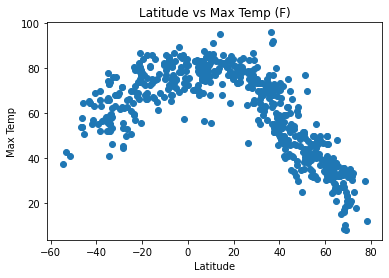

In [21]:
x_lat = weather_df['Lat']
y_temp = weather_df['Max Temp']
plt.scatter(x_lat, y_temp)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Latitude vs Max Temp (F)')
plt.savefig("../Images/Latitude vs Max Temp.png")
plt.show()


# this scatter plot maps the latitude of the city against its max temperature for this sample
the more "central" latitudes tend to have the higher temps, and the temps then tend to drop the further away from the equator that they are

## Latitude vs. Humidity Plot

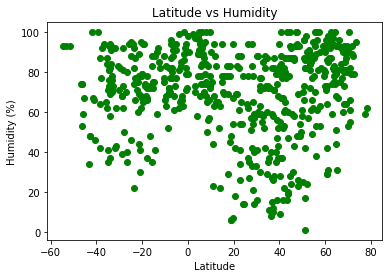

In [20]:
x_lat = weather_df['Lat']
y_humidity = weather_df['Humidity']
plt.scatter(x_lat, y_humidity, facecolor = 'green')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Latitude vs Humidity')
plt.savefig("../Images/Latitude vs Humidity.png")
plt.show()

# this plot charts the latitude against the humidity of the city
most cities in this sample have a humidity above 40%

## Latitude vs. Cloudiness Plot

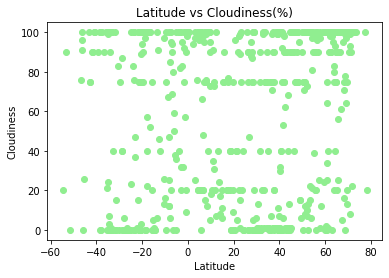

In [22]:
x_lat = weather_df['Lat']
y_humidity = weather_df['Cloudiness']
plt.scatter(x_lat, y_humidity, facecolor = 'lightgreen')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs Cloudiness(%)')
plt.savefig("../Images/Latitude vs Cloudiness.png")
plt.show()

# this plot charts the latitude against the cloudiness of the city
in this sample, it seems like "cloudines" tends to either be very cloudy (almost 80% to 100%), or little-to-no clouds (20% or below); interestingly, most of the measurements seem to come in intervals (hence how the points seem/tend to make something resembling a line

## Latitude vs. Wind Speed Plot

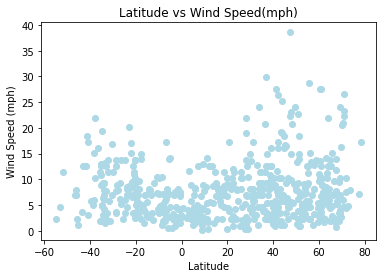

In [23]:
x_lat = weather_df['Lat']
y_wind = weather_df['Wind Speed']
plt.scatter(x_lat, y_wind, facecolor = 'lightblue')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Latitude vs Wind Speed(mph)')
plt.savefig("../Images/Latitude vs Wind Speed.png")
plt.show()

# this chart plots the  latitude versus the wind speed of the city
most of the wind speeds fall below 10 mph; 15 mph seems to be the "line" before the outliers

## Linear Regression

In [26]:
#separate into hemispheres to work with
northern_hemi = weather_df.loc[weather_df["Lat"] >= 0]
southern_hemi = weather_df.loc[weather_df["Lat"] < 0]
northern_hemi.head()

,City,Country,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Date
1,Ginir,ET,7.1333,40.7000,56.46,87,95,3.89,1619831276
2,Portland,US,45.5234,-122.6762,66.20,59,90,3.44,1619830862
7,São Filipe,CV,14.8961,-24.4956,72.88,75,11,6.80,1619831277
9,Mangan,IN,27.5167,88.5333,72.90,51,88,2.01,1619831278
10,Khatanga,RU,71.9667,102.5000,33.42,88,100,10.27,1619831278


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

1      85.418606
2      51.218704
7      78.503099
9      67.260011
10     27.661634
         ...    
558    56.565064
559    61.128008
560    37.676059
561    74.246518
564    34.826312
Name: Lat, Length: 388, dtype: float64
y = -0.89x +91.77
The r-value is: 0.7850888970621932


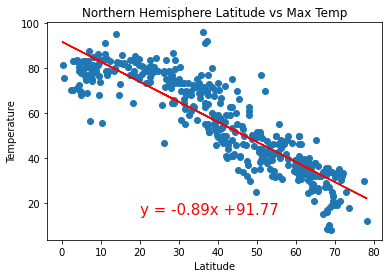

In [64]:
# Create a Scatter Plot for temperature vs latitude
x_values_north = northern_hemi['Lat']
y_values = northern_hemi['Max Temp']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_north, y_values)

# Get regression values
regress_values = x_values_north * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values_north,y_values)
plt.plot(x_values_north,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Northern Hemisphere Latitude vs Max Temp')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

plt.savefig("../Images/NH Temp regress.png")

# Show plot
plt.show()

# thinking about positive vs. negative correlation is tricky with this type of data, as higher numbers means a greater distance from the equator ("negative" latitudes just designate that the value is below the equator)

# there is a negative correlation between the temp and the latitude in the northern hemisphere
the temperature trends down the higher the latitude (aka the temp tends to drop the further away from the equator)

the correlation is pretty strong with these measurements for this sample

The r-value is: 0.46937863826630627


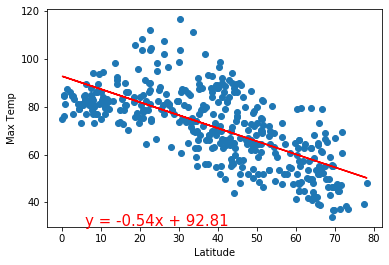

In [25]:
#original preview preserved below

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

0      78.357395
3      62.111942
4      69.528693
5      81.509076
6      76.203751
         ...    
551    55.085564
552    72.710061
553    59.467330
562    81.865665
563    60.443177
Name: Lat, Length: 177, dtype: float64
y = 0.59x +81.94
The r-value is: 0.4841263043868672


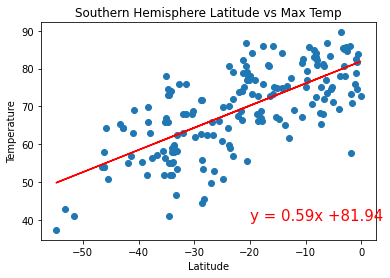

In [63]:
# Create a Scatter Plot for temperature vs latitude
x_values_south = southern_hemi['Lat']
y_values = southern_hemi['Max Temp']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_south, y_values)

# Get regression values
regress_values = x_values_south * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values_south,y_values)
plt.plot(x_values_south,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Southern Hemisphere Latitude vs Max Temp')
plt.annotate(line_eq,(-20,40),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

plt.savefig("../Images/SH Temp regress.png")

# Show plot
plt.show()

# the temperature works similarly with the Southern hemisphere
the lower the latitude (/greater the distance from the equator), the lower the temp; this is technically a positive correlation for these measurements

Even though they are opposite types of correlations (positive versus negative), they show the same thing (temp decreases when further from the equator); if this comparison used a different measurement (such as using a measured distance from the equator), we would very likely see a very similar trend

the r value/correlation isn't as strong for the southern hemisphere as it is for the northern (in this dataset)

The r-value is: 0.6082708688906918


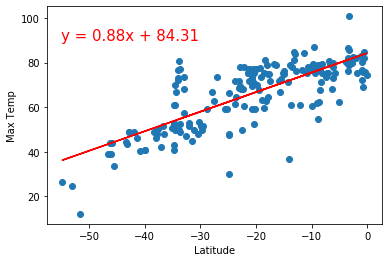

In [26]:
#original preview preserved below

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

1      64.009588
2      68.900528
7      64.998577
9      66.606455
10     72.269432
         ...    
558    68.135943
559    67.483395
560    70.837266
561    65.607312
564    71.244809
Name: Lat, Length: 388, dtype: float64
y = 0.13x +63.1
The r-value is: 0.011721317103899202


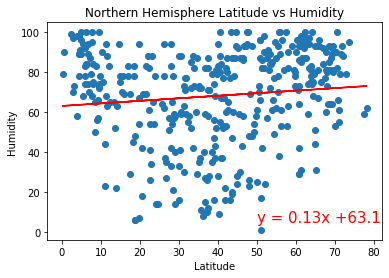

In [41]:
# Create a Scatter Plot for humidity vs latitude
x_values_north = northern_hemi['Lat']
y_values = northern_hemi['Humidity']

# Perform a linear regression on humidity vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_north, y_values)

# Get regression values
regress_values = x_values_north * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values_north,y_values)
plt.plot(x_values_north,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere Latitude vs Humidity')
plt.annotate(line_eq,(50,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

plt.savefig("../Images/NH Humidity regress.png")

# Show plot
plt.show()

# there is a very, very weak positive correlation for latitude and humidity in the nothern hemisphere

The r-value is: 0.000543987878808455


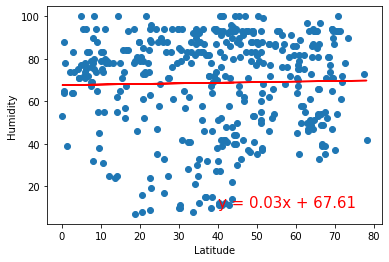

In [27]:
#original preview preserved

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

0      76.280282
3      70.817359
4      73.311420
5      77.340111
6      75.556068
         ...    
551    68.454572
552    74.381231
553    69.928045
562    77.460022
563    70.256197
Name: Lat, Length: 177, dtype: float64
y = 0.2x +77.49
The r-value is: 0.024822688405177467


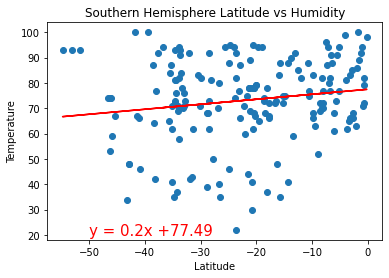

In [51]:
# Create a Scatter Plot for temperature vs latitude
x_values_south = southern_hemi['Lat']
y_values = southern_hemi['Humidity']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_south, y_values)

# Get regression values
regress_values = x_values_south * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values_south,y_values)
plt.plot(x_values_south,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Southern Hemisphere Latitude vs Humidity')
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

plt.savefig("../Images/SH Humidity regress.png")

# Show plot
plt.show()

# there is a very, very weak positive correlation for the southern hemisphere too

The r-value is: 0.014985174297345524


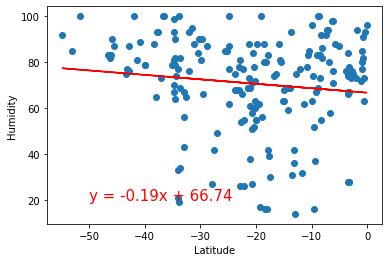

In [28]:
#original preview preserved

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

1      48.421840
2      60.799361
7      50.924679
9      54.993742
10     69.325062
         ...    
558    58.864423
559    57.213017
560    65.700672
561    52.465207
564    66.732044
Name: Lat, Length: 388, dtype: float64
y = 0.32x +46.12
The r-value is: 0.026271110011349394


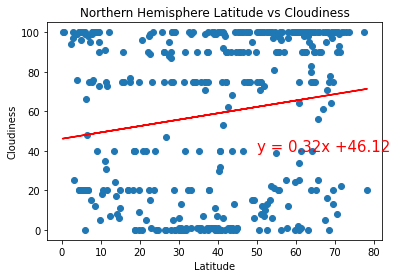

In [54]:
# Create a Scatter Plot for cloudiness vs latitude
x_values_north = northern_hemi['Lat']
y_values = northern_hemi['Cloudiness']

# Perform a linear regression on cloudiness vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_north, y_values)

# Get regression values
regress_values = x_values_north * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values_north,y_values)
plt.plot(x_values_north,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere Latitude vs Cloudiness')
plt.annotate(line_eq,(50,40),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

plt.savefig("../Images/NH Cloudiness regress.png")

# Show plot
plt.show()

# there is a very weak positive correlation between cloudiness and latitude in the north

The r-value is: 0.0020898727664228514


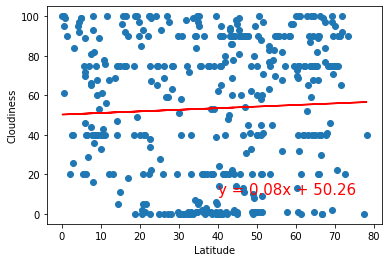

In [29]:
#original preserved below

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

0      53.793338
3      48.015373
4      50.653264
5      54.914285
6      53.027359
         ...    
551    45.516326
552    51.784770
553    47.074774
562    55.041112
563    47.421850
Name: Lat, Length: 177, dtype: float64
y = 0.21x +55.07
The r-value is: 0.004358343926828985


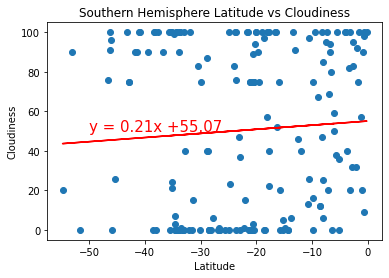

In [56]:
# Create a Scatter Plot for Cloudiness vs latitude
x_values_south = southern_hemi['Lat']
y_values = southern_hemi['Cloudiness']

# Perform a linear regression on cloudiness vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_south, y_values)

# Get regression values
regress_values = x_values_south * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values_south,y_values)
plt.plot(x_values_south,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere Latitude vs Cloudiness')
plt.annotate(line_eq,(-50,50),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

plt.savefig("../Images/SH Cloudiness regress.png")

# Show plot
plt.show()

# there is an even weaker positive correlation between latitude and cloudiness in the south
this makes sense, given that the data here looks to be mostly 0 or 100 for cloudiness

The r-value is: 0.0035263772085582894


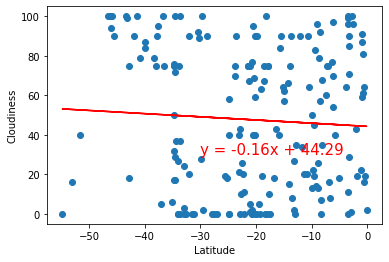

In [30]:
#original preview below

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

1      5.668823
2      8.128263
7      6.166143
9      6.974674
10     9.822338
         ...   
558    7.743787
559    7.415649
560    9.102164
561    6.472249
564    9.307100
Name: Lat, Length: 388, dtype: float64
y = 0.06x +5.21
The r-value is: 0.046685333695372894


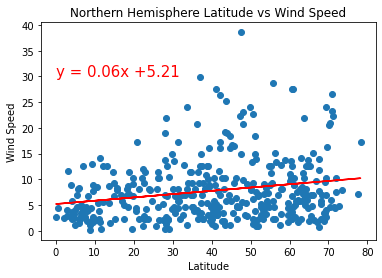

In [58]:
# Create a Scatter Plot for wind speed vs latitude
x_values_north = northern_hemi['Lat']
y_values = northern_hemi['Wind Speed']

# Perform a linear regression on wind dpeed vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_north, y_values)

# Get regression values
regress_values = x_values_north * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values_north,y_values)
plt.plot(x_values_north,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere Latitude vs Wind Speed')
plt.annotate(line_eq,(0,30),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

plt.savefig("../Images/NH Wind Speed regress.png")

# Show plot
plt.show()

# there is a weak positve correlation between latitude and wind speed in the north

similar to the broader sharts above, most values fall within the 0-15 mph range

The r-value is: 0.04019723576144484


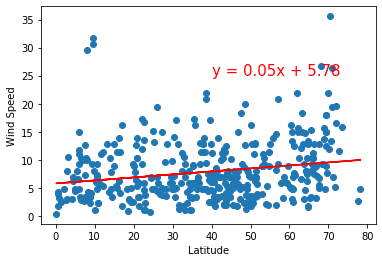

In [31]:
#original preview below

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

0      5.844829
3      8.403079
4      7.235127
5      5.348518
6      6.183974
         ...   
551    9.509557
552    6.734142
553    8.819539
562    5.292365
563    8.665868
Name: Lat, Length: 177, dtype: float64
y = -0.09x +5.28
The r-value is: 0.0736164976301174


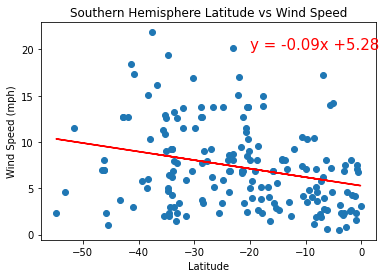

In [62]:
# Create a Scatter Plot for wind speed vs latitude
x_values_south = southern_hemi['Lat']
y_values = southern_hemi['Wind Speed']

# Perform a linear regression on wind speed vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_south, y_values)

# Get regression values
regress_values = x_values_south * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values_south,y_values)
plt.plot(x_values_south,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere Latitude vs Wind Speed')
plt.annotate(line_eq,(-20,20),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

plt.savefig("../Images/SH Wind Speed regress.png")

# Show plot
plt.show()

# there is a weak negative correlation between latitude and wind speed in the southern hemisphere

however, like the northern hemisphere, the the wind speed tends to be higher the further from the equator

# again, the "negative" latitudes are a bit misleading, as "positive" versus "negative" values for latitude don't mean that the values are positive or negative; the positive and negative aspects just serve to orient the location along a center point (0 latitude, aka the equator)

The r-value is: 0.017128274759839232


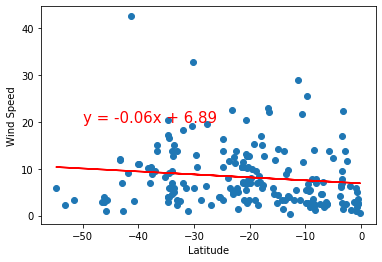

In [32]:
#original preview below